In [424]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as rnd
import os as _dir


In [425]:
#Get csv and store into variable programmatically 
csv_filelist = ["Mouse_metadata.csv","Study_results.csv"]
working_dir = _dir.getcwd()
for csv in csv_filelist:   
    for root, dirs, files in _dir.walk(working_dir):
        if csv in files:
            if csv == csv_filelist[0]:
                mouse_metadata_path = (_dir.path.join(root, csv))
            else:
               study_results_path =  (_dir.path.join(root, csv))

In [426]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_resultset = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display the data table for preview
combine_resultset.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [427]:
 # Checking the number of mice.
combine_resultset['Mouse ID'].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [428]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mouse = combine_resultset.loc[combine_resultset.duplicated(subset=['Mouse ID','Timepoint'])== True, 'Mouse ID'].unique()
# Get all the data for the duplicate mouse ID.
print(f'Mouse {duplicated_mouse[0]} has duplication on both the Mouse ID and Timepoint column') 
combine_resultset.loc[combine_resultset['Mouse ID'] == duplicated_mouse[0]]

Mouse g989 has duplication on both the Mouse ID and Timepoint column


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [429]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combine_resultset = combine_resultset.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')

In [430]:
# Checking the number of mice in the clean DataFrame.
clean_combine_resultset['Mouse ID'].describe()

count     1888
unique     249
top       q787
freq        10
Name: Mouse ID, dtype: object

## Summary Statistics

### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
* Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
* mean, median, variance, standard deviation, and SEM of the tumor volume. 
* Assemble the resulting series into a single summary dataframe.

In [431]:
summary_stats = clean_combine_resultset.groupby('Drug Regimen')
summary_index_df = pd.DataFrame(summary_stats['Drug Regimen'].unique())
summary_list = list(zip(summary_stats['Tumor Volume (mm3)'].mean(),summary_stats['Tumor Volume (mm3)'].median(),summary_stats['Tumor Volume (mm3)'].var(),summary_stats['Tumor Volume (mm3)'].std(),summary_stats['Tumor Volume (mm3)'].sem()))
summary_df = pd.DataFrame(summary_list,columns=['Tumor Vol (Avg)','Tumor Vol (Median)','Tumor Vol (Variance)', 'Tumor Vol (Std Dev)', 'Tumor Vol (SEM)'])
for x in range(0,5):
    summary_df_col = summary_df.columns[x]
    summary_df[summary_df_col] = summary_df[summary_df_col].map("{:,.2f}".format)
summary_df.set_index(summary_index_df.index.values)

,Tumor Vol (Avg),Tumor Vol (Median),Tumor Vol (Variance),Tumor Vol (Std Dev),Tumor Vol (SEM)
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52


In [432]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']).round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

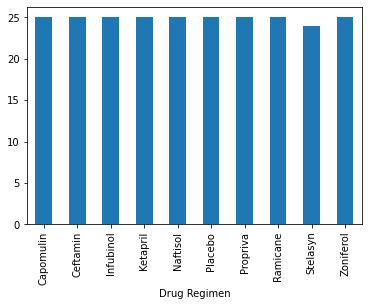

<Figure size 432x288 with 0 Axes>

In [433]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_data = summary_stats['Mouse ID'].nunique()
plot_bar_data = bar_data.plot.bar()
plt.show()
plt.show()
plt.tight_layout()

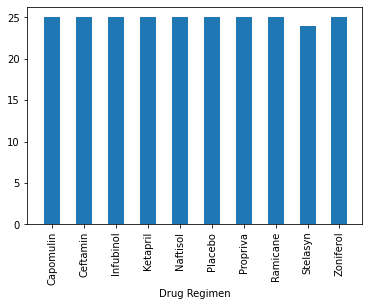

In [434]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(bar_data))
x_ticks = [value for value in x_axis]
plt.figure(figsize=(6, 4))
plt.xticks(x_ticks, bar_data.index.values, rotation=90)
plt.xlim(-0.80, len(x_axis)-0.30)
plt.xlabel("Drug Regimen")
plt.bar(x_axis,bar_data, align='center',width=.5)
plt.show()

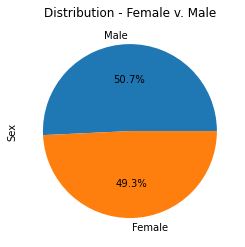

<Figure size 432x288 with 0 Axes>

In [435]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data = clean_combine_resultset['Sex'].value_counts()
pie_data.plot(kind='pie',autopct="%1.1f%%",startangle=360)
plt.title('Distribution - Female v. Male')
plt.show()
plt.tight_layout()

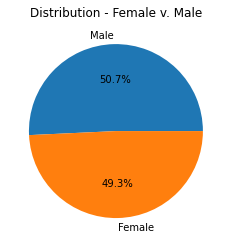

In [436]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_data,autopct="%1.1f%%",labels=pie_data.index.values)
plt.title('Distribution - Female v. Male')
plt.show()

## Quartiles, Outliers and Boxplots

In [472]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

qob_df = clean_combine_resultset.loc[clean_combine_resultset['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]

sorted_df['Timepoint']

1892    45
1700    45
1364    45
1497    45
1844    45
        ..
1355     0
1755     0
1624     0
555      0
0        0
Name: Timepoint, Length: 814, dtype: int64

## Line and Scatter Plots

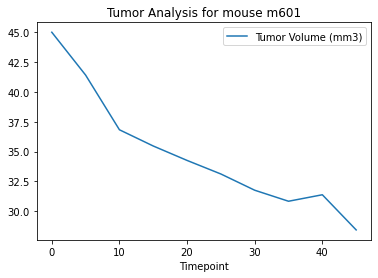

In [437]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Random was used in order to pick a random mouse from the dataset that was based upon the Capomulin Regimen
rnd_mouse= clean_combine_resultset.loc[clean_combine_resultset['Drug Regimen'] == 'Capomulin','Mouse ID'].unique()
rnd_mouse = rnd.choice(rnd_mouse)
line_data = clean_combine_resultset.loc[clean_combine_resultset['Mouse ID'] == rnd_mouse]
line_data.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title(f'Tumor Analysis for mouse {rnd_mouse}')
plt.show()

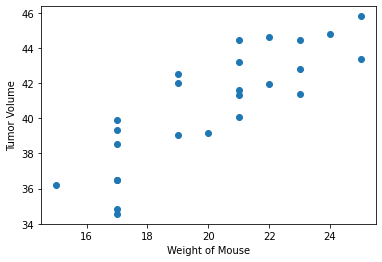

In [438]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_data = clean_combine_resultset.loc[clean_combine_resultset['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = round(scatter_data.groupby(scatter_data["Mouse ID"])["Tumor Volume (mm3)"].mean(),2)
mouse_weight = scatter_data.groupby(scatter_data["Mouse ID"])["Weight (g)"].unique()

plt.scatter(mouse_weight,avg_tumor_vol)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

In [443]:
# Calculate the correlation coefficient model for mouse weight and average tumor volume for the Capomulin regimen
weight = []
avg_vol = []
for w in mouse_weight:
    weight.append(w[0])
for a in avg_tumor_vol:
    avg_vol.append(a)
correlation = st.pearsonr(weight,avg_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.7087213191554544


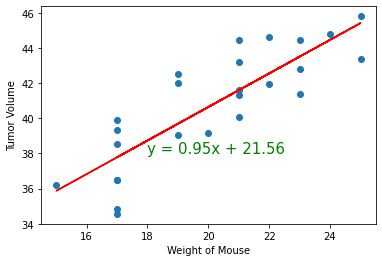

In [456]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight,avg_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,avg_tumor_vol)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="green")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [423]:
%reset